In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/GLv5_GWRPM25_mean2020-2022.shp')
df

DataSourceError: /data/acker/ALA/GLv5_GWRPM25_mean2021-2023.shp: No such file or directory

KeyboardInterrupt: 

In [ ]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [ ]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [ ]:
counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

NameError: name 'counties_conus' is not defined

In [ ]:
counties_conus = counties_conus.to_crs(df.crs)

In [ ]:
import geopandas as gpd
import pandas as pd

# Parameters
chunk_size = 10000  # Adjust this based on your memory capacity

# Initialize an empty list to store results
results = []

# Iterate over chunks of the data
for i in range(0, len(df), chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    chunk_result = gpd.sjoin(chunk, counties_conus[['GEOID', 'geometry']], how="left", predicate="within")
    chunk_result.dropna(subset=['GEOID'], inplace=True)  # Drop rows where GEOID is NaN in this chunk
    results.append(chunk_result)

# Concatenate all chunk results
df_counties = pd.concat(results, ignore_index=True)


In [ ]:
df_counties

,lat,lon,GWRPM25,geometry,index_right,GEOID
0,18.915001,-155.675003,3.366667,POINT (-155.675 18.915),269.0,15001
1,18.924999,-155.675003,3.266667,POINT (-155.675 18.925),269.0,15001
2,18.924999,-155.664993,3.233333,POINT (-155.66499 18.925),269.0,15001
3,18.924999,-155.654999,3.033334,POINT (-155.655 18.925),269.0,15001
4,18.934999,-155.675003,3.133333,POINT (-155.675 18.935),269.0,15001
...,...,...,...,...,...,...
10185882,67.995003,-141.044998,3.733333,POINT (-141.045 67.995),2780.0,02290
10185883,67.995003,-141.035004,3.800000,POINT (-141.035 67.995),2780.0,02290
10185884,67.995003,-141.024994,3.900000,POINT (-141.02499 67.995),2780.0,02290
10185885,67.995003,-141.014999,3.966666,POINT (-141.015 67.995),2780.0,02290


In [ ]:
# Group by GEOID and calculate the 90th percentile of GWRPM25 for each county
county_90th_percentile = df_counties.groupby('GEOID')['GWRPM25'].quantile(0.9).reset_index()

# Rename the column for clarity
county_90th_percentile = county_90th_percentile.rename(columns={'GWRPM25': 'PM25_90th'})

# Display the result
print(county_90th_percentile)


      GEOID  PM25_90th
0     01001   7.533333
1     01003   8.366667
2     01005   7.266666
3     01007   7.466667
4     01009   7.166667
...     ...        ...
3137  56037   6.133333
3138  56039   5.166667
3139  56041   6.700000
3140  56043   5.366667
3141  56045   8.599999

[3142 rows x 2 columns]


In [ ]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
county_90th_percentile_with_geometry = county_90th_percentile.merge(counties[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')

# Display the result
print(county_90th_percentile_with_geometry)


      GEOID  PM25_90th                                           geometry  \
0     01001   7.533333  POLYGON ((-86.9212 32.65754, -86.92035 32.6585...   
1     01003   8.366667  POLYGON ((-88.02858 30.22676, -88.02399 30.230...   
2     01005   7.266666  POLYGON ((-85.74803 31.61918, -85.74544 31.618...   
3     01007   7.466667  POLYGON ((-87.42194 33.00338, -87.33177 33.005...   
4     01009   7.166667  POLYGON ((-86.96336 33.85822, -86.95967 33.857...   
...     ...        ...                                                ...   
3137  56037   6.133333  POLYGON ((-110.05438 42.01103, -110.05436 42.0...   
3138  56039   5.166667  POLYGON ((-111.05361 44.66627, -110.75076 44.6...   
3139  56041   6.700000  POLYGON ((-111.04663 41.14012, -111.04662 41.1...   
3140  56043   5.366667  POLYGON ((-108.55063 44.15179, -108.55056 44.1...   
3141  56045   8.599999  POLYGON ((-105.08123 43.65128, -105.0808 43.71...   

     STUSPS  
0        AL  
1        AL  
2        AL  
3        AL  
4    

In [ ]:
# Extract the North Slope row from `counties_conus`
north_slope = counties_conus[counties_conus['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['PM25_90th'] = None

'''# Append this row to the `county_90th_percentile_with_geometry` DataFrame
county_90th_percentile_with_geometry = pd.concat([county_90th_percentile_with_geometry, north_slope], ignore_index=True)

# Ensure it's a GeoDataFrame with the correct geometry
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')'''

"# Append this row to the `county_90th_percentile_with_geometry` DataFrame\ncounty_90th_percentile_with_geometry = pd.concat([county_90th_percentile_with_geometry, north_slope], ignore_index=True)\n\n# Ensure it's a GeoDataFrame with the correct geometry\ncounty_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')"

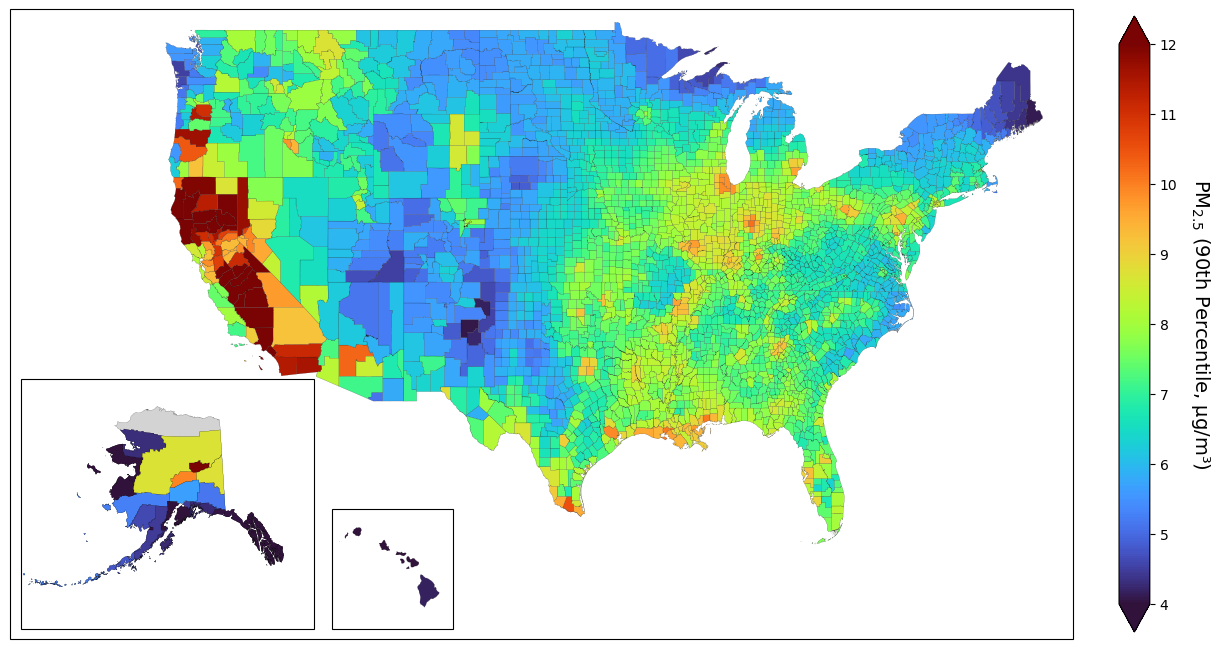

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

# Define the data column and color map
data_column = 'PM25_90th'
cmap = 'turbo'
norm = mpl.colors.Normalize(vmin=4, vmax=12)  # Adjust vmin and vmax based on your data range

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.19, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = county_90th_percentile_with_geometry[
    (county_90th_percentile_with_geometry['GEOID'].str.startswith('02')) & 
    (county_90th_percentile_with_geometry['GEOID'] != '02185')
]
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot Alaska counties
alaska_counties.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black',
    ax=ax_alaska, missing_kwds=missing_kwds, transform=ccrs.PlateCarree()
)

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.19, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_conus, missing_kwds=missing_kwds
)
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_alaska, missing_kwds=missing_kwds, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_hawaii, missing_kwds=missing_kwds
)

# Plot North Slope separately in gray

# Add a colorbar to the main map
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to an empty array to use custom normalization
cbar = fig.colorbar(sm, ax=ax_conus, orientation='vertical', fraction=0.046, pad=0.04, shrink=0.8, extend='both')
cbar.set_label('PM$_{2.5}$ (90th Percentile, µg/m³)', fontsize=14, rotation=270, labelpad=25)

# Add a title to the plot
plt.show()


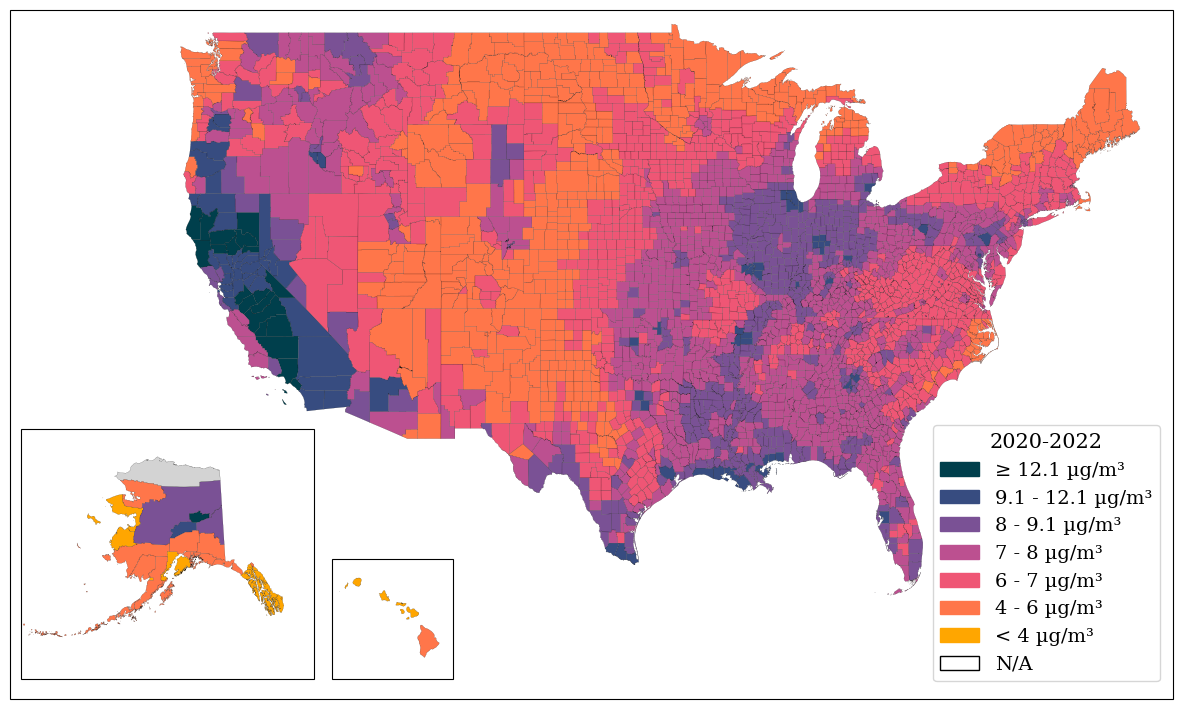

In [45]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = county_90th_percentile_with_geometry.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 12.1 µg/m³": "#003f4c",
    "9.1 - 12.1 µg/m³": "#374c80",
    "8 - 9.1 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = county_90th_percentile_with_geometry[
    (county_90th_percentile_with_geometry['GEOID'].str.startswith('02')) & 
    (county_90th_percentile_with_geometry['GEOID'] != '02185')
]

# Plot Alaska counties
'''alaska_counties.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9.1 µg/m³", "9.1 - 12.1 µg/m³", "≥ 12.1 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)
# Load custom font
plt.rcParams["font.family"] = "serif"

plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.9, 2.2),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=14,
    title_fontsize=15
)

# Add a title to the plot
plt.savefig('all_cdves.jpg', dpi=1000)
plt.show()


In [13]:
# epa CDVs for pearson
gdf_epa = gpd.read_file('/data/acker/for_lizzy/EPA_COUNTY_V2/EPA_countyDV_2022_v2.shp')

In [14]:
import numpy as np

# Set values that are 0 in F2020_2022 to NaN in gdf_epa
gdf_epa.loc[gdf_epa['F2020_2022'] == 0, 'F2020_2022'] = np.nan

# Drop rows where F2020_2022 is NaN, so only counties with valid EPA data remain
gdf_epa.dropna(subset=['F2020_2022'], inplace=True)

# Step 1: Identify GEOIDs with valid F2020_2022 values in gdf_epa
epa_geoids = gdf_epa['GEOID'].unique()

# Step 3: Identify unmonitored counties
unmonitored_counties = county_90th_percentile_with_geometry[
    ~county_90th_percentile_with_geometry['GEOID'].isin(epa_geoids)
]

# Step 2: Update PM25_90th in county_90th_percentile_with_geometry to NaN for GEOIDs not in epa_geoids
county_90th_percentile_with_geometry.loc[
    ~county_90th_percentile_with_geometry['GEOID'].isin(epa_geoids), 'PM25_90th'
] = np.nan


In [15]:
unmonitored_counties

,GEOID,PM25_90th,geometry,STUSPS,color
0,01001,7.533333,"POLYGON ((-86.92119 32.65754, -86.92035 32.658...",AL,#bc5090
2,01005,7.266666,"POLYGON ((-85.74803 31.61918, -85.74543 31.618...",AL,#bc5090
3,01007,7.466667,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",AL,#bc5090
4,01009,7.166667,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",AL,#bc5090
5,01011,7.066667,"POLYGON ((-85.99926 32.25018, -85.98655 32.250...",AL,#bc5090
...,...,...,...,...,...
3135,56033,6.200000,"POLYGON ((-107.91152 45.00068, -107.90818 45.0...",WY,#ef5675
3137,56037,6.133333,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",WY,#ef5675
3139,56041,6.700000,"POLYGON ((-111.04663 41.14013, -111.04662 41.1...",WY,#ef5675
3140,56043,5.366667,"POLYGON ((-108.55063 44.1518, -108.55056 44.16...",WY,#ff764a


In [16]:
monitor_sat = county_90th_percentile_with_geometry.dropna(inplace=False)

In [17]:
monitor_sat

,GEOID,PM25_90th,geometry,STUSPS,color
1,01003,8.366667,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",AL,#7a5195
13,01027,7.100000,"POLYGON ((-86.17416 33.1124, -86.17392 33.1211...",AL,#bc5090
24,01049,7.066667,"POLYGON ((-86.11889 34.40384, -86.11002 34.403...",AL,#bc5090
27,01055,7.766666,"POLYGON ((-86.36962 33.94118, -86.36804 33.942...",AL,#bc5090
36,01073,8.603334,"POLYGON ((-87.34095 33.47109, -87.33833 33.474...",AL,#7a5195
...,...,...,...,...,...
3129,56021,6.500000,"POLYGON ((-105.2802 41.39538, -105.2776 41.395...",WY,#ef5675
3131,56025,6.266666,"POLYGON ((-107.54353 42.78136, -107.50143 42.7...",WY,#ef5675
3133,56029,5.466667,"POLYGON ((-111.05456 45.00096, -111.04507 45.0...",WY,#ff764a
3136,56035,5.100000,"POLYGON ((-110.62344 42.77921, -110.60511 42.7...",WY,#ff764a


In [18]:
gdf_epa.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME',
       'NAMELSAD', 'STUSPS', 'STATE_NAME', 'LSAD', 'ALAND', 'AWATER',
       'State_Na_1', 'County_Nam', 'State_FIPS', 'County_FIP', 'EPA_Region',
       'AQS_Site_I', 'F2020_2022', 'CBSA_Name', 'GEOID_1', 'GEOID_copy',
       'ObjectID_1', 'geometry'],
      dtype='object')

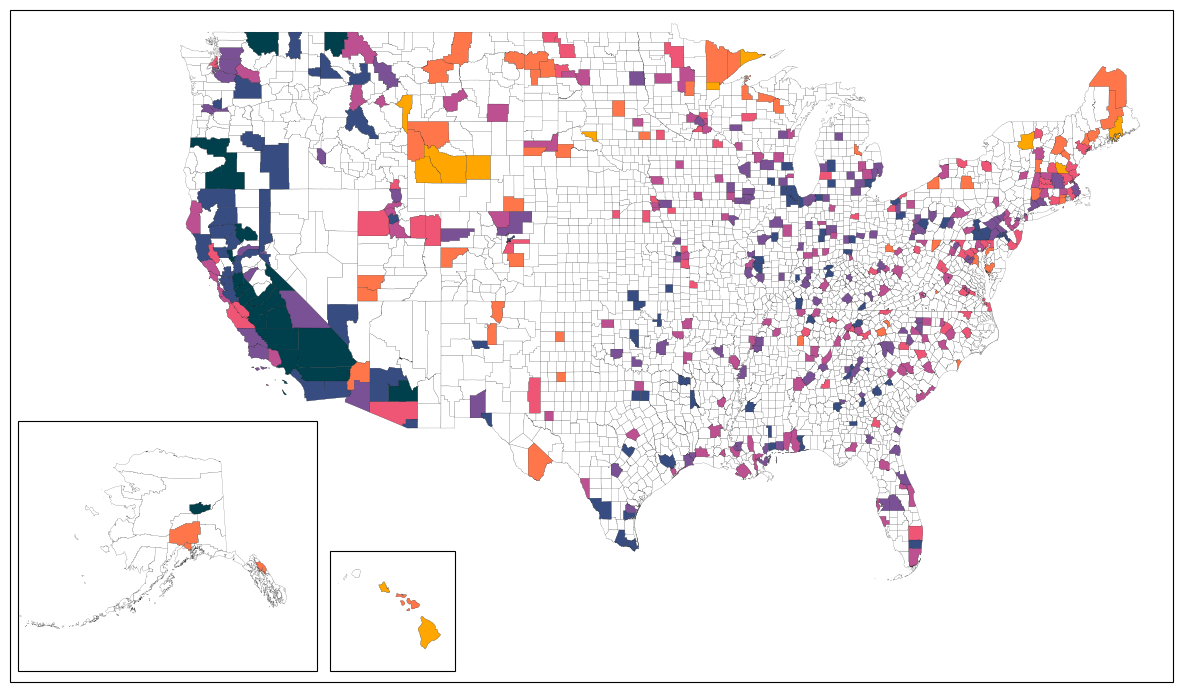

In [26]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

gdf_epa = gdf_epa.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'F2020_2022'
range_colors = {
    "≥ 12.1 µg/m³": "#003f4c",
    "9.1 - 12.1 µg/m³": "#374c80",
    "8 - 9.1 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]

# Create a new column for colors
gdf_epa['color'] = gdf_epa[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = gdf_epa[
    (gdf_epa['GEOID'].str.startswith('02')) & 
    (gdf_epa['GEOID'] != '02185')
]

# Plot Alaska counties
'''alaska_counties.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='white', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)


# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot the data for each map, including the color for missing data
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9.1 µg/m³", "9.1 - 12.1 µg/m³", "≥ 12.1 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=11,
    title_fontsize=12
)'''

# Add a title to the plot
plt.savefig('epa_dv.jpg', dpi=1000)
plt.show()


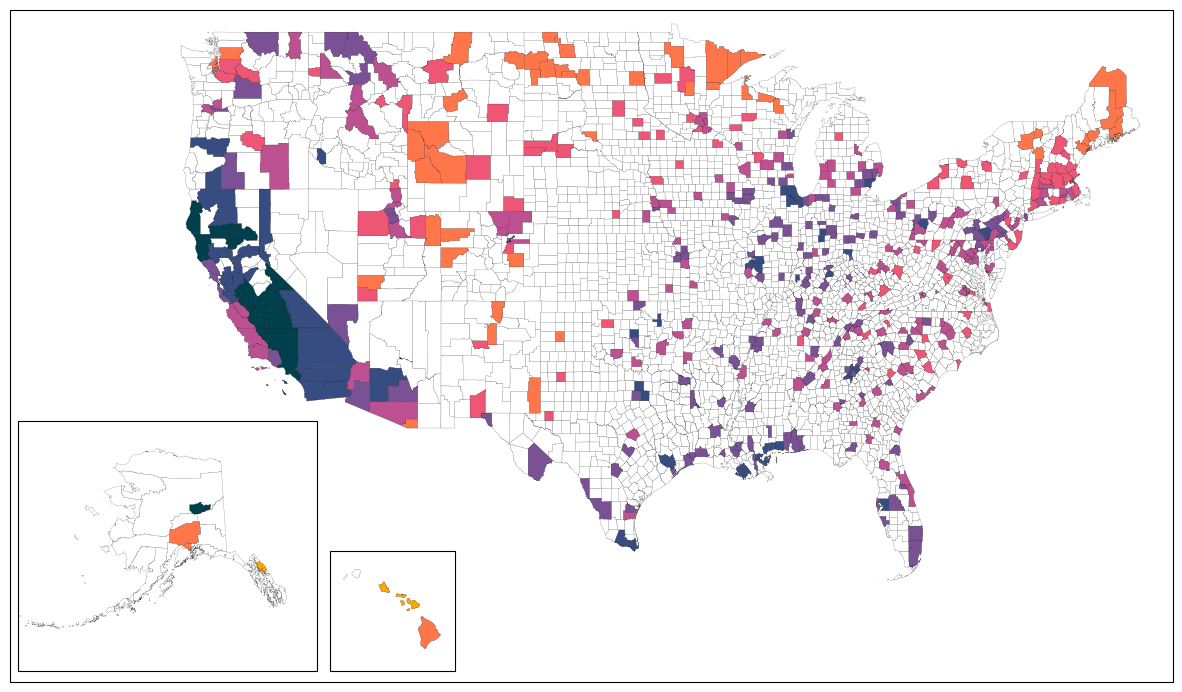

In [27]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

monitor_sat = monitor_sat.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 12.1 µg/m³": "#003f4c",
    "9.1 - 12.1 µg/m³": "#374c80",
    "8 - 9.1 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

'''# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]

# Create a new column for colors
monitor_sat['color'] = monitor_sat[data_column].apply(assign_color)'''


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = monitor_sat[
    (monitor_sat['GEOID'].str.startswith('02')) & 
    (monitor_sat['GEOID'] != '02185')
]

# Plot Alaska counties
'''alaska_counties.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='white', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot the data for each map, including the color for missing data
monitor_sat.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
monitor_sat.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
monitor_sat.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9.1 µg/m³", "9.1 - 12.1 µg/m³", "≥ 12.1 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=11,
    title_fontsize=12
)'''

# Add a title to the plot
plt.savefig('monitor_CDVE.jpg', dpi=1000)
plt.show()


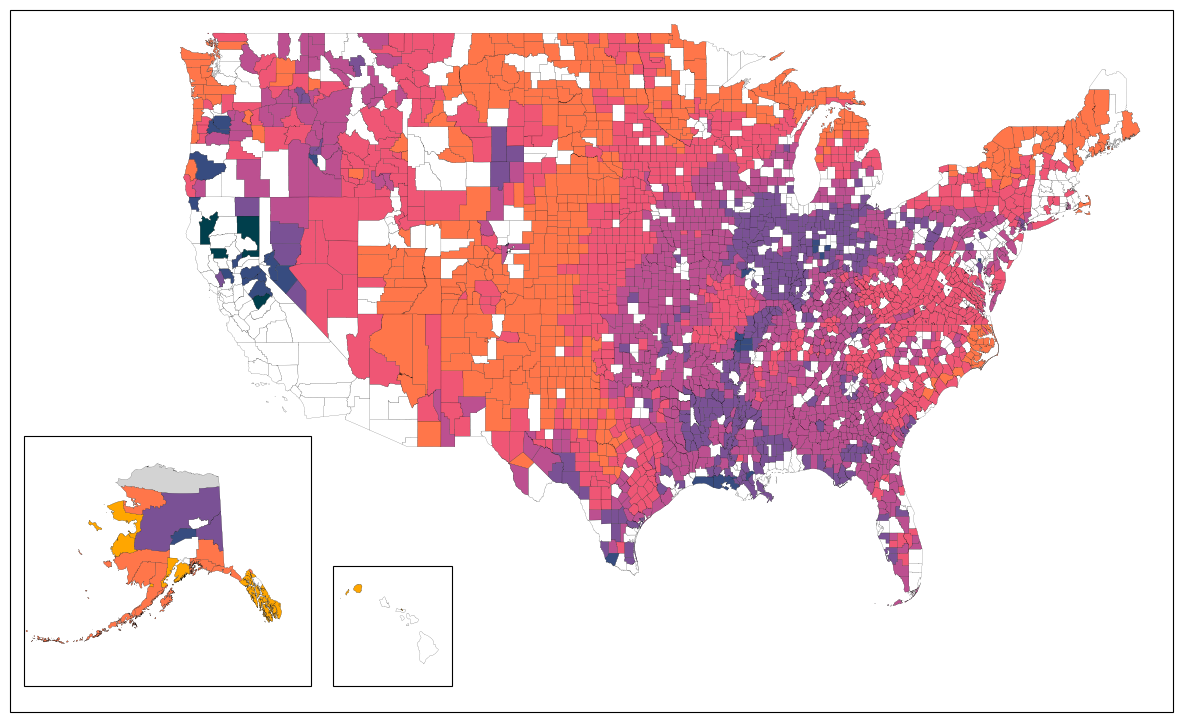

In [28]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

unmonitored_counties = unmonitored_counties.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 12.1 µg/m³": "#003f4c",
    "9.1 - 12.1 µg/m³": "#374c80",
    "8 - 9.1 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

'''# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]

# Create a new column for colors
unmonitored_counties['color'] = unmonitored_counties[data_column].apply(assign_color)'''


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = unmonitored_counties[
    (unmonitored_counties['GEOID'].str.startswith('02')) & 
    (unmonitored_counties['GEOID'] != '02185')
]

# Plot Alaska counties
'''alaska_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot the data for each map, including the color for missing data
unmonitored_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
unmonitored_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
unmonitored_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9.1 µg/m³", "9.1 - 12.1 µg/m³", "≥ 12.1 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=11,
    title_fontsize=12
)'''

# Add a title to the plot
plt.savefig('unmon_CDVE.jpg', dpi=1000)
plt.show()


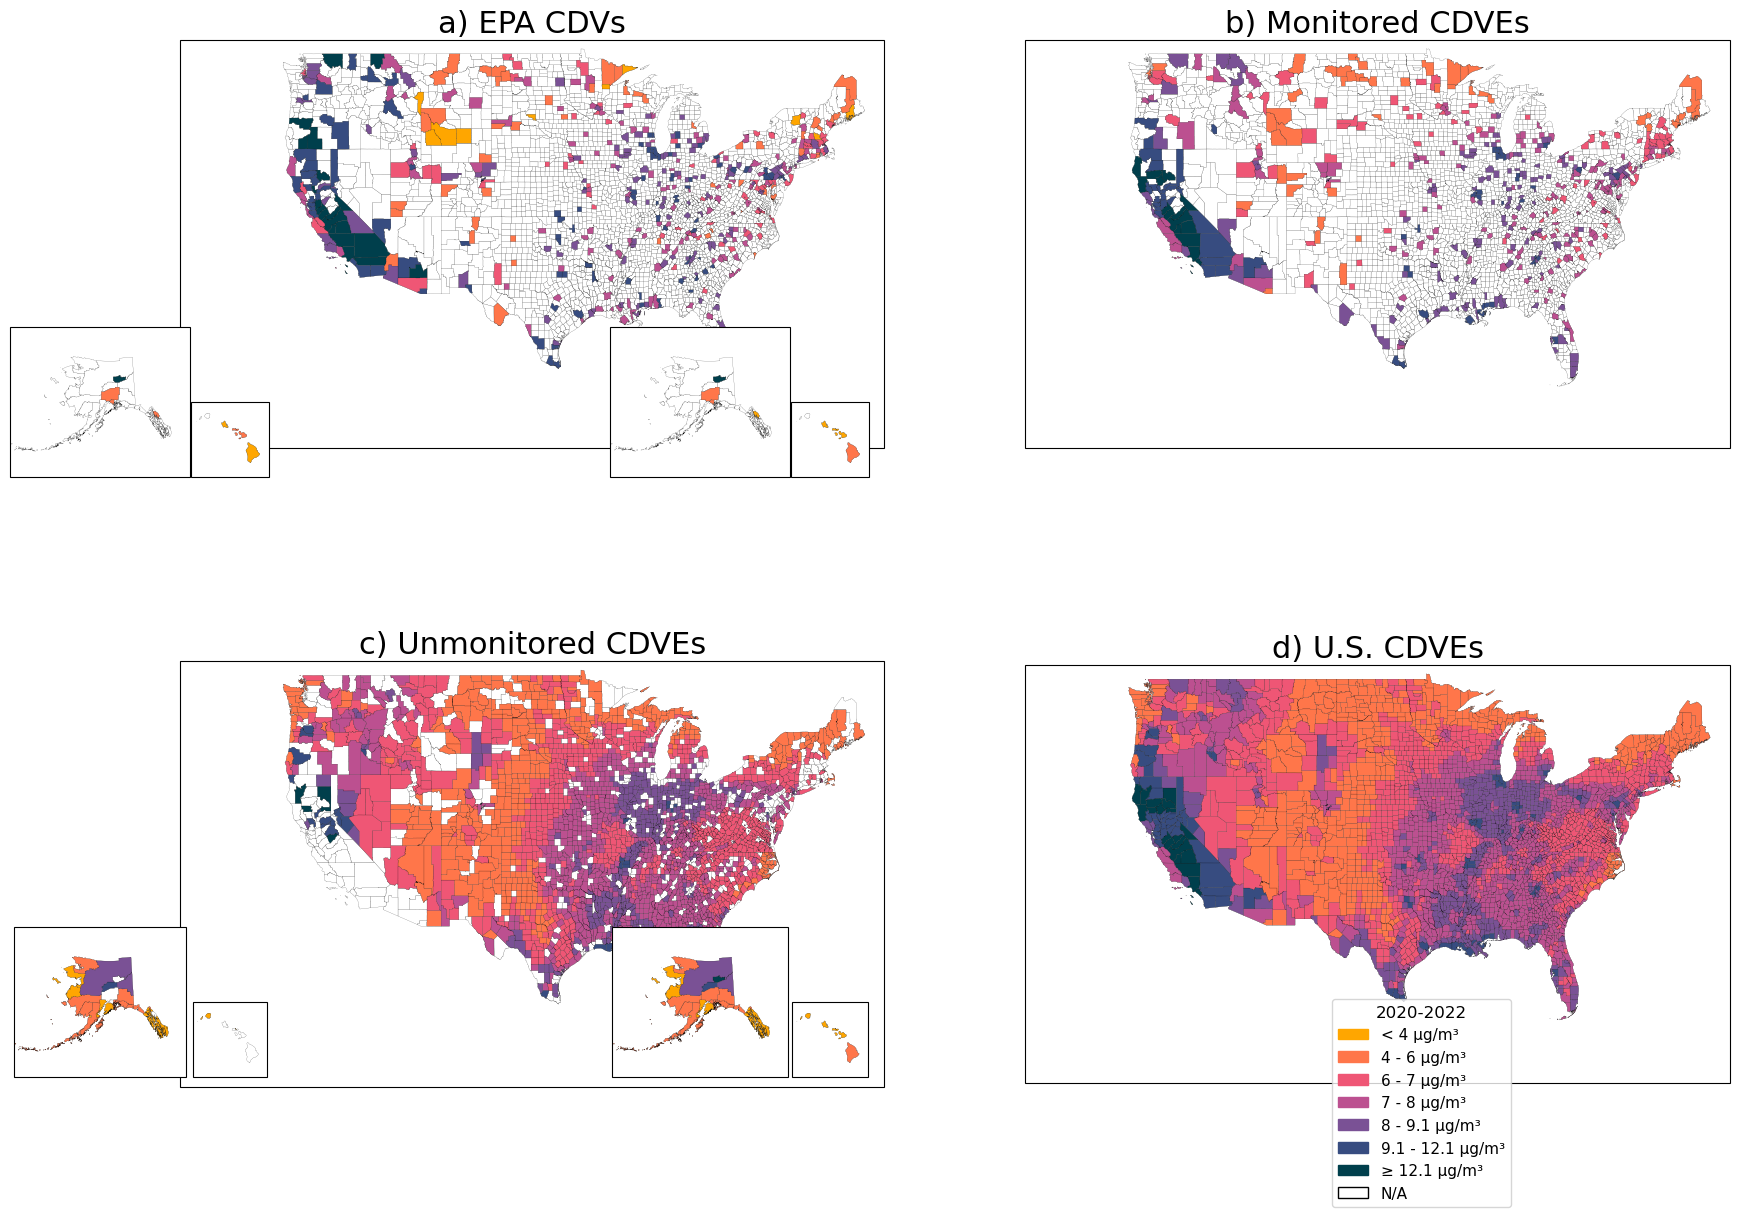

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patches as mpatches

# Assuming `gdf_epa`, `monitor_sat`, `unmonitored_counties`, and `county_90th_percentile_with_geometry`
# are the dataframes for the four maps.

# Define the data column and range colors
data_column = 'PM25_90th'
range_colors = {
    "≥ 12.1 µg/m³": "#003f4c",
    "9.1 - 12.1 µg/m³": "#374c80",
    "8 - 9.1 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()

datasets = [gdf_epa, monitor_sat, unmonitored_counties, county_90th_percentile_with_geometry]
titles = [
    "a) EPA CDVs",
    "b) Monitored CDVEs",
    "c) Unmonitored CDVEs",
    "d) U.S. CDVEs"
]

for i, (ax, data, title) in enumerate(zip(axes, datasets, titles)):
    # Plot the CONUS map
    ax.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())
    # Alaska inset
    alaska_ax = fig.add_axes([0.035 + 0.3 * (i % 2), 0.55 - 0.4 * (i // 2), 0.1, 0.1],
                             projection=ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60))
    alaska_ax.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())
    
    # Hawaii inset
    hawaii_ax = fig.add_axes([0.125 + 0.3 * (i % 2), 0.55 - 0.4 * (i // 2), 0.05, 0.05],
                             projection=ccrs.PlateCarree())
    hawaii_ax.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())
    
    #county boundaries plot 
    county_90th_percentile_with_geometry.plot(
        color='white', linewidth=0.1, edgecolor='black', ax=ax
    )
    county_90th_percentile_with_geometry.plot(
        color='white', linewidth=0.1, edgecolor='black', ax=alaska_ax, transform=ccrs.PlateCarree()
    )
    county_90th_percentile_with_geometry.plot(
        color='white', linewidth=0.1, edgecolor='black', ax=hawaii_ax
    )
    
    data.plot(color=data['color'], linewidth=0.1, edgecolor='black', ax=ax)
    
    
    data.plot(color=data['color'], linewidth=0.1, edgecolor='black', ax=alaska_ax, transform=ccrs.PlateCarree())
    
    
    data.plot(color=data['color'], linewidth=0.1, edgecolor='black', ax=hawaii_ax)
    
    ax.set_title(title, fontsize=22)

# Add legend to the last panel
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(range_colors.keys())]
legend_patches.append(mpatches.Patch(facecolor="white", edgecolor="black", label="N/A"))
axes[3].legend(handles=legend_patches, bbox_to_anchor=(0.7, 0.22), title="2020-2022",
               fontsize=11, title_fontsize=12)

#plt.tight_layout()
plt.show()
